In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import sys

In [2]:
headers = ["carat",	"cut","color","clarity","depth","table","price","x","y","z"]
data = pd.read_csv('diamonds.csv') 
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
cat_data = data.select_dtypes(include=["object"])
cat_data.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


In [4]:
cat_data.groupby("cut").size()

cut
Fair          1610
Good          4906
Ideal        21551
Premium      13791
Very Good    12082
dtype: int64

In [5]:
cat_data.groupby("color").size()

color
D     6775
E     9797
F     9542
G    11292
H     8304
I     5422
J     2808
dtype: int64

In [6]:
cat_data.groupby("clarity").size()

clarity
I1        741
IF       1790
SI1     13065
SI2      9194
VS1      8171
VS2     12258
VVS1     3655
VVS2     5066
dtype: int64

In [7]:
clarity_list = cat_data["clarity"].astype("category").cat.categories.tolist()
color_list = cat_data["color"].astype("category").cat.categories.tolist()
cut_list = cat_data["cut"].astype("category").cat.categories.tolist()
replace_dict = {}
replace_dict["clarity"] = {k:v for (k,v) in zip(clarity_list,range(len(clarity_list)))}
replace_dict["color"] = {k:v for (k,v) in zip(color_list,range(len(color_list)))}
replace_dict["cut"] = {k:v for (k,v) in zip(cut_list,range(len(cut_list)))}


In [8]:
replace_dict

{'clarity': {'I1': 0,
  'IF': 1,
  'SI1': 2,
  'SI2': 3,
  'VS1': 4,
  'VS2': 5,
  'VVS1': 6,
  'VVS2': 7},
 'color': {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6},
 'cut': {'Fair': 0, 'Good': 1, 'Ideal': 2, 'Premium': 3, 'Very Good': 4}}

In [9]:
data_copy = data.copy()
data_copy.replace(replace_dict,inplace = True)
data_copy.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [10]:
data_copy.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.017124,0.291437,-0.214290,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
cut,0.017124,1.000000,0.000304,0.028235,-0.194249,0.150327,0.039860,0.022342,0.027572,0.002037
color,0.291437,0.000304,1.000000,-0.027795,0.047279,0.026465,0.172511,0.270287,0.263584,0.268227
clarity,-0.214290,0.028235,-0.027795,1.000000,-0.053080,-0.088223,-0.071535,-0.225721,-0.217616,-0.224263
depth,0.028224,-0.194249,0.047279,-0.053080,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,0.150327,0.026465,-0.088223,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,0.039860,0.172511,-0.071535,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,0.022342,0.270287,-0.225721,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,0.027572,0.263584,-0.217616,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.002037,0.268227,-0.224263,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [11]:
Y = data_copy["price"].values
X = data_copy.loc[:,data.columns!="price"].values

In [12]:
def preprocess(X):
    for x in X.T:
        avg = x.mean()
        xrange = np.amax(x) - np.amin(x) + 1
        x-=avg
        x/=xrange
    return X


In [13]:
X_temp,X_test,Y_temp,Y_test = model_selection.train_test_split(X,Y,test_size = 0.2,random_state =42)
X_train,X_val,Y_train,Y_val = model_selection.train_test_split(X_temp,Y_temp,test_size = 0.25,random_state =42)

In [14]:
def get_dist(X_train,X):
    X_t = preprocess(X_train)
    X_v = preprocess(X)
    return np.sum(np.square(X_t),axis=1) + np.sum(np.square(X_v),axis=1)[:,np.newaxis] -2*np.dot(X_v,X_t.T)


In [15]:
initial_dist = np.argpartition(get_dist(X_train,X_val),range(16),axis=-1)

In [16]:
k = [2,3,5,7,11,16]
final_dist = np.argpartition(get_dist(X_temp,X_test),range(16),axis=-1)
    

In [20]:
for i in k:
    print("The score of k = {} is : {}".format(i,r2_score(Y_test,Y_temp[final_dist[:,:i]].sum(axis=1)/i)))


The score of k = 2 is : 0.8894734200547642
The score of k = 3 is : 0.8980336388476272
The score of k = 5 is : 0.9057047862352736
The score of k = 7 is : 0.9102642888295412
The score of k = 11 is : 0.9150712441060944
The score of k = 16 is : 0.9181499461452332


In [31]:
from scipy import stats
stats.mode(Y_temp[final_dist[:,:5]],axis=1)[2]

IndexError: tuple index out of range

In [29]:
Y_temp[final_dist[:,:5]]

array([[  559,   582,   559,   559,   605],
       [ 2054,  2041,  2633,  2351,  1891],
       [  779,   896,  1013,   779,   864],
       ...,
       [  395,   515,   648,  1013,   472],
       [ 9032, 10957, 10923,  9660, 10727],
       [ 3733,  3639,  3088,  3149,  4824]])

In [ ]:
plt.plot()

In [24]:
r2_score(Y_test,get_res(preprocess(X_test),w))


NameError: name 'get_res' is not defined

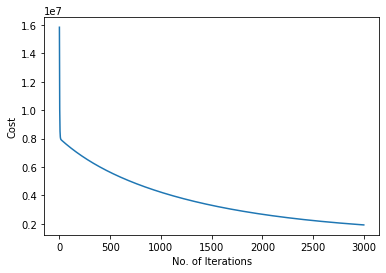

In [443]:
plt.xlabel("No. of Iterations")
plt.ylabel("Cost")
plt.plot(cost)

In [387]:
lr = LinearRegression().fit(X_train,Y_train)

In [388]:
r2_score(Y_test,lr.predict(X_test))

0.7927149221212234